<a href="https://colab.research.google.com/github/udehben/neural-network-from-scratch/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nnfs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

In [ ]:
nnfs.init()

In [ ]:
X,y = spiral_data(samples=100, classes=3)

<function matplotlib.pyplot.show>

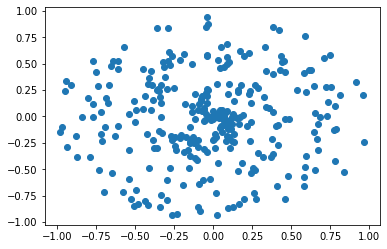

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show

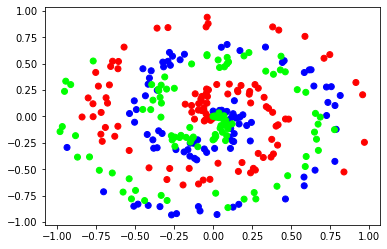

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [ ]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

In [ ]:
# Perform a forward pass of our training data through this layer
dense1.forward(X)

In [ ]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

Let’s apply this activation function to the dense layer’s outputs in our code:

In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

In [ ]:
# Let's see output of the first few samples:
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


In [13]:
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

In [14]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

In [15]:
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.33333343 0.3333333 ]
 [0.33333296 0.33333385 0.33333316]
 [0.33333233 0.33333507 0.33333266]
 [0.33333194 0.33333552 0.33333248]]
